In [49]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split

In [ ]:
!python3 -m spacy download en_core_web_sm

Подгружаем данные, выводим первые 10 строк

In [51]:
data = pd.read_csv('Stress.csv')
data.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,1,0.8,1483582174
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1514843984
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1,1.0,1490428087


Произведем оценку репрезентативности датасета. Можно наблюдать, что элементы некоторых классов представлены в меньшем процентном соотношении. Однако общее отношение "стрессовых" и "нестрессовых" классов почти равное.

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

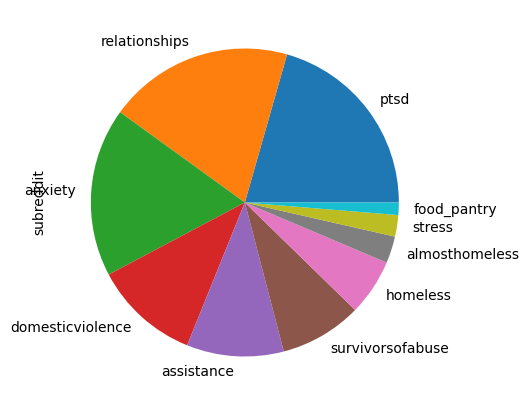

In [52]:

plot = data['subreddit'].value_counts().plot.pie(y='subreddit', figsize=(5, 5))
data['subreddit'].value_counts()


1    1488
0    1350
Name: label, dtype: int64

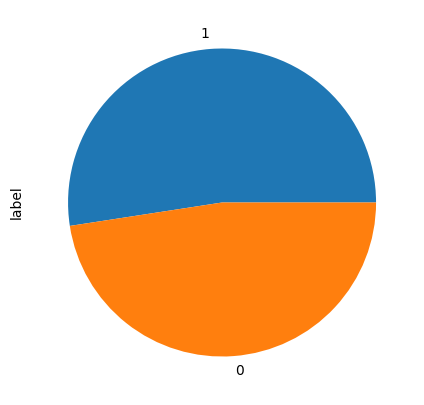

In [53]:
plot = data['label'].value_counts().plot.pie(y='label', figsize=(5, 5))
data['label'].value_counts()

Произведем очистку текстов от символов пунктуации, чисел, ненужных пробелов и тд.
Сформируем новую колонку "чистого" текста. Ниже представлен пример исходного текста

In [54]:
data['text'].iloc[2]

'My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. Do I send out this vibe asking for it from the universe? Then yesterday I decided to take my friend to go help another "friend" move to a new place. While we were driving the friend we are moving strikes me on my shoulder. And I address it immediately because this is the 4th time I have told him not to do these things, then my other friend who is driving nearly gets into an collision with another car i think because he was high on marijuana and the friend we are moving in the backseat is like "you have to understand I was just trying to get your attention" you know the thing 5 year olds do to get peoples attention by smacking them, this guy is in his 60\'s.'

In [55]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

data['cleaned_text'] = data['text'].apply(
    lambda x: ' '.join(
        token.lemma_.lower() for token in nlp(x) if 
        not token.is_stop 
        and not token.is_punct
        and not token.is_digit
        and not token.like_email
        and not token.like_num
        and not token.is_space
    )
)

Текст после очистки

In [56]:
data['cleaned_text'].iloc[2]

'mom hit newspaper shock know like play hit smacking striking hit violence sort person send vibe ask universe yesterday decide friend help friend new place drive friend move strike shoulder address immediately time tell thing friend drive nearly get collision car think high marijuana friend move backseat like understand try attention know thing year old people attention smack guy'

Произведем разделение выборки на обучающую и валидационную

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'])

X_train

2100    edit thread get attention imagine people offer...
1333    asset sell outside broken android phone family...
2493    try pay old bill like delinquent + electric bi...
2677    ok original trauma molest grandfather start go...
2053    got connect dv shelter town connect crime vict...
                              ...                        
1331    sister shift worker work clock ridiculous time...
2410    try read plenty motivational quote day strengt...
1001    work hard spend money fail drive test idea ret...
621     thank reading time update probably add terrify...
2461    snot slobber uncontrollable sadness explain la...
Name: cleaned_text, Length: 2128, dtype: object